In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import scipy

In [3]:
import os

# Loading pairwise correlation data

In [4]:
h = pd.read_csv("heatmap-data.csv")

In [5]:
h

,Unnamed: 0,subset,A_ref,A_metric,A_align,A_CR_pearson,A_label,B_ref,B_metric,B_align,B_CR_pearson,B_label,A_B_pearson,A_B_sign_pv,A_B_sign_level
0,0,both,intp,bleu,mwer,0.578390,bleu intp mwer,intp,bertscore.f1,mwer,0.596079,bertscore.f1 intp mwer,0.655109,4.294359e-01,0.429436
1,1,both,intp,bertscore.f1,mwer,0.596079,bertscore.f1 intp mwer,intp,bleu,mwer,0.578390,bleu intp mwer,0.655109,4.294359e-01,0.429436
2,2,both,intp,bleu,mwer,0.578390,bleu intp mwer,intp,bleu,one_seq,0.648726,bleu intp one_seq,0.917657,1.166165e-10,0.000000
3,3,both,intp,bleu,one_seq,0.648726,bleu intp one_seq,intp,bleu,mwer,0.578390,bleu intp mwer,0.917657,1.166165e-10,0.000000
4,4,both,intp,bleu,mwer,0.578390,bleu intp mwer,intp,chrf,mwer,0.650360,chrf intp mwer,0.785699,3.376163e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,1513,nat,ref,comet-da,one_seq,0.748054,comet-da ref one_seq,ref+intp,comet-da,one_seq,0.741534,comet-da ref+intp one_seq,0.983678,4.150713e-01,0.415071
1514,1514,nat,ref+intp,comet-da,one_seq,0.741534,comet-da ref+intp one_seq,ref,comet-da,sent,0.761709,comet-da ref sent,0.895078,2.994385e-01,0.299438
1515,1515,nat,ref,comet-da,sent,0.761709,comet-da ref sent,ref+intp,comet-da,one_seq,0.741534,comet-da ref+intp one_seq,0.895078,2.994385e-01,0.299438
1516,1516,nat,ref,comet-da,one_seq,0.748054,comet-da ref one_seq,ref,comet-da,sent,0.761709,comet-da ref sent,0.905352,4.586540e-01,0.458654


# LaTeX Table 3

In [6]:
## translate labels to nicer LaTeX macros
def metric(x):
    m = {
        "comet-da": "COMET",
        "bertscore.f1": "\\BertScore{}",
        "chrf": "\\chrf{}",
        "bleu": "BLEU",
    }
    return m[x]

def ref(x):
    r = {
        "ref": "\\transl{}",
        "intp": "\\intp{}",
        "ref+intp": "\\transl{}+\\intp{}",
        "ref+mw-intp": "\\transl{}+\\intp{}"
    }
    return r[x]

def al(x):
    if "+" in x:
        return "+".join(al(s) for s in x.split("+"))
    a = {
        "sent": "\sent{}",
        "one_seq": "\singleseq",
        "mw": "\mwer{}",
        "mwer":"\mwer{}"
    }
    return a[x]

# translate labels to nicer words to appear in heatmaps labels in the paper
def metric_nice(x):
    m = {
        "comet-da": "COMET",
        "bertscore.f1": "BertScore",
        "chrf": "chrF2",
        "bleu": "BLEU",
    }
    return m[x]

def ref_nice(x):
    r = {
        "ref": "transl",
        "intp": "intp",
        "ref+intp": "transl+intp",
        "ref+mw-intp": "transl+intp"
    }
    return r[x]

def al_nice(x):
    if "+" in x:
        return "+".join(al_nice(s) for s in x.split("+"))
    a = {
        "sent": "sent",
        "one_seq": "singleseq",
        "mw": "mwer",
        "mwer":"mwer"
    }
    return a[x]

def translate_label(label):
    m, r, a = label.split()
    m = metric_nice(m)
    r = ref_nice(r)
    a = al_nice(a)
    return "%s %s %s" % (m,r,a)

In [7]:
d = h
d = d[d.subset=="both"]
g = d.groupby(["A_ref","A_metric","A_align"]).mean().reset_index().sort_values("A_CR_pearson",ascending=False)



# generate Latex version of Table 3. 
# Then, observe the significance groups and insert the layers manually.
for i,r in g.iterrows():
    m = metric(r.A_metric)
    re = ref(r.A_ref)
    a = al(r.A_align)
    print("%s & %s & %s & %0.2f \\\\" % (m,re,a,r.A_CR_pearson))

COMET & \transl{} & \sent{} & 0.80 \\
COMET & \transl{} & \singleseq & 0.79 \\
COMET & \transl{}+\intp{} & \singleseq & 0.79 \\
\BertScore{} & \transl{} & \sent{} & 0.77 \\
\BertScore{} & \transl{}+\intp{} & \sent{}+\mwer{} & 0.77 \\
COMET & \intp{} & \singleseq & 0.77 \\
\BertScore{} & \transl{}+\intp{} & \singleseq & 0.76 \\
\BertScore{} & \transl{} & \singleseq & 0.75 \\
\chrf{} & \transl{}+\intp{} & \sent{}+\mwer{} & 0.73 \\
BLEU & \transl{}+\intp{} & \singleseq & 0.73 \\
\chrf{} & \transl{} & \sent{} & 0.73 \\
\chrf{} & \transl{}+\intp{} & \singleseq & 0.72 \\
\chrf{} & \transl{} & \singleseq & 0.72 \\
BLEU & \transl{} & \singleseq & 0.71 \\
COMET & \intp{} & \mwer{} & 0.71 \\
\BertScore{} & \intp{} & \singleseq & 0.69 \\
BLEU & \transl{}+\intp{} & \sent{}+\mwer{} & 0.68 \\
\chrf{} & \intp{} & \singleseq & 0.66 \\
BLEU & \transl{} & \sent{} & 0.65 \\
\chrf{} & \intp{} & \mwer{} & 0.65 \\
BLEU & \intp{} & \singleseq & 0.65 \\
\BertScore{} & \intp{} & \mwer{} & 0.60 \\
BLEU & \intp{

/tmp/ipykernel_2703393/2965688514.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = d.groupby(["A_ref","A_metric","A_align"]).mean().reset_index().sort_values("A_CR_pearson",ascending=False)


# Appendix D: Figures 3-5

Captions: Results of significance test (p-values rounded to two decimal digits) for difference of correlations of the
metrics variants to CR. The metrics variants are ordered by Pearson correlation to CR on both/Common/NonNative subsets from most
correlating (top left) to least (bottom right). The bold numbers on the diagonal are the correlation coefficients to CR.

both


/tmp/ipykernel_2703393/2370960416.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d = d.pivot("A_nice_label","B_nice_label","A_B_sign_level")


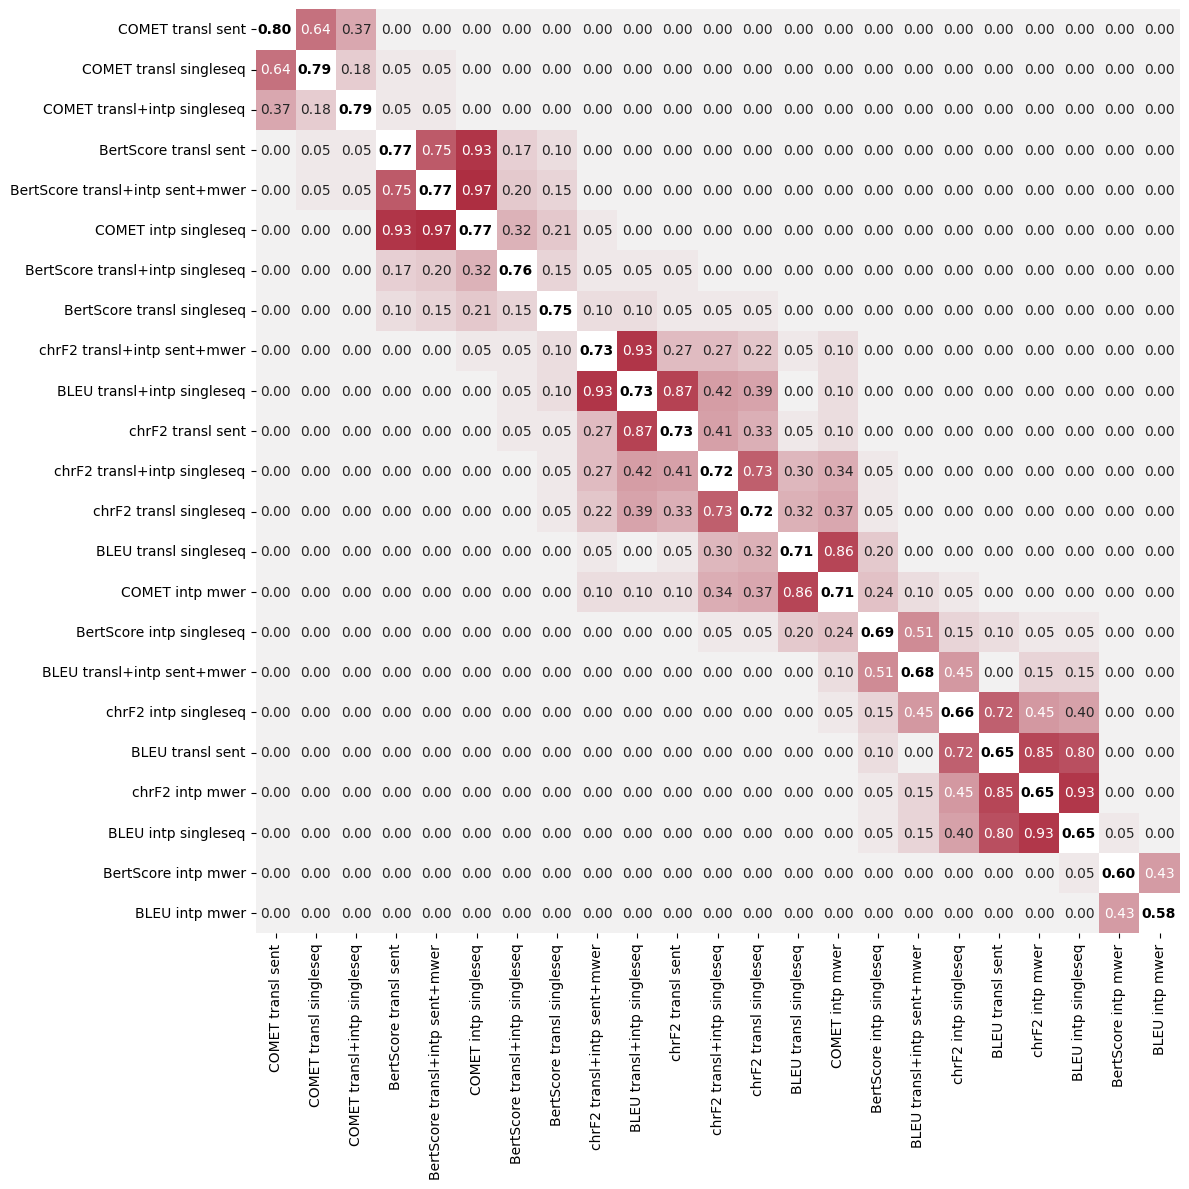

nat


/tmp/ipykernel_2703393/2370960416.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d = d.pivot("A_nice_label","B_nice_label","A_B_sign_level")


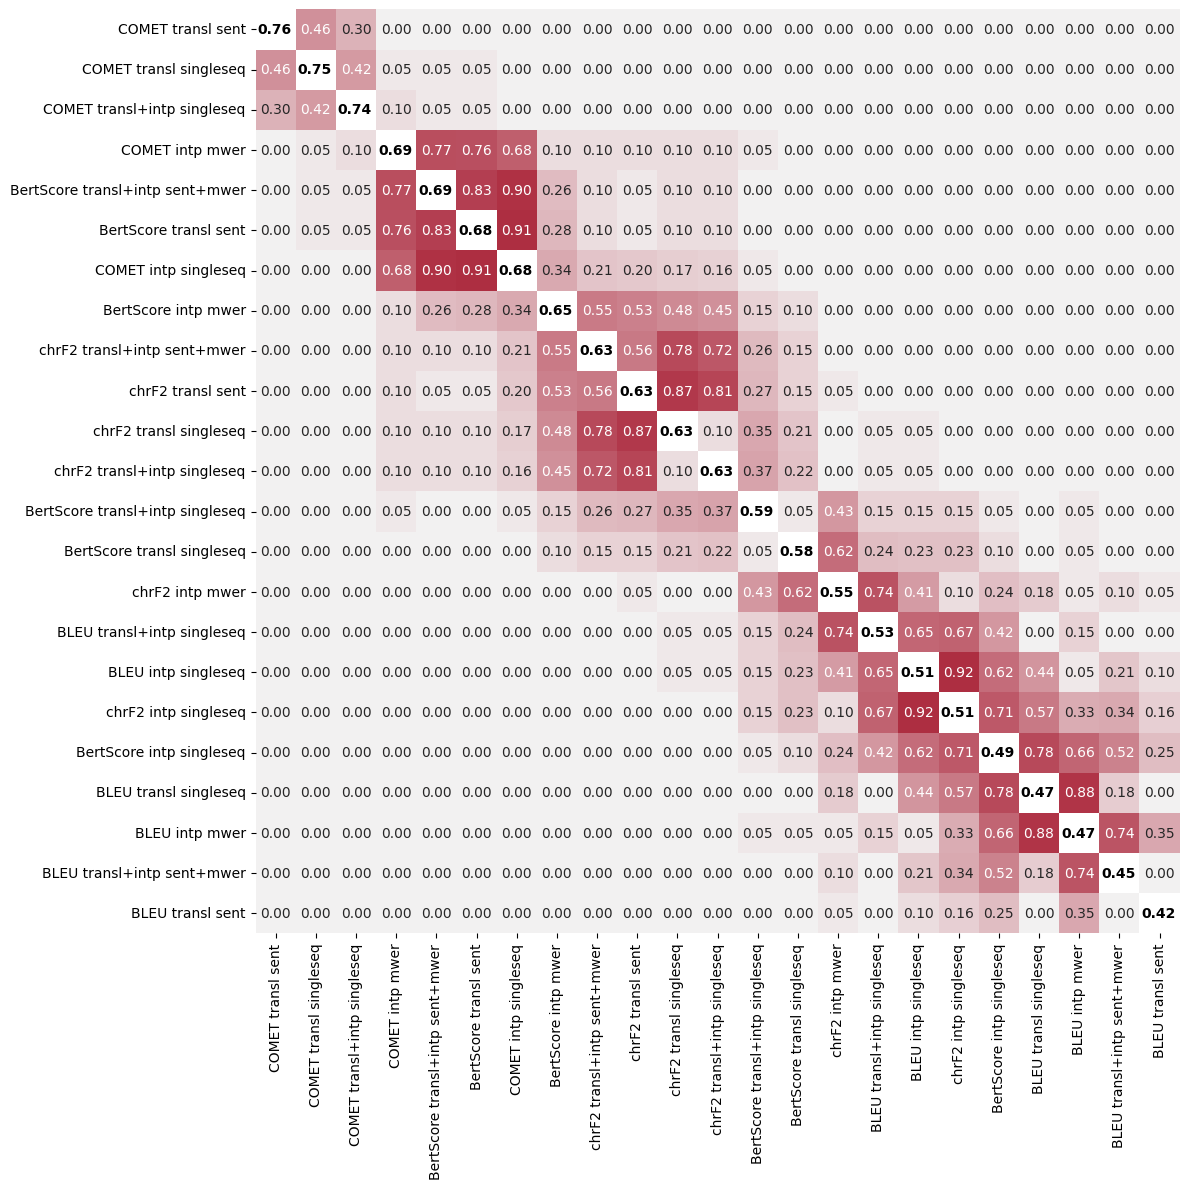

nonn


/tmp/ipykernel_2703393/2370960416.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d = d.pivot("A_nice_label","B_nice_label","A_B_sign_level")


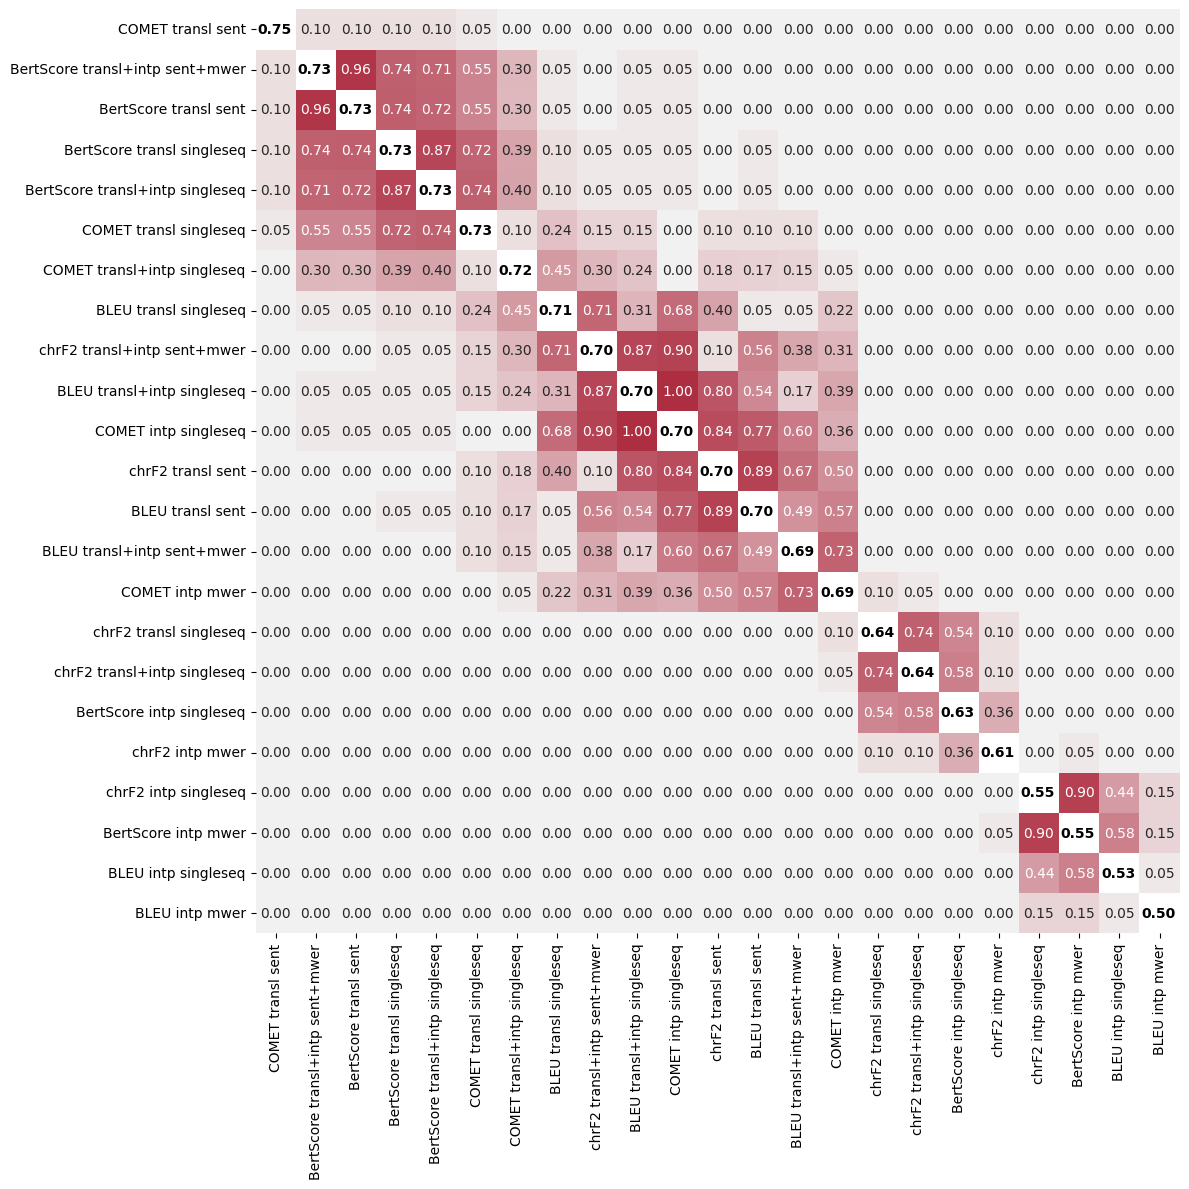

In [11]:
for subs in ["both","nat","nonn"]:
    print(subs)
    cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

    plt.figure(figsize=(20, 12))
    d = h[h.subset==subs]
    d.insert(d.shape[1],"A_nice_label",[translate_label(l) for l in d.A_label])
    d.insert(d.shape[1],"B_nice_label",[translate_label(l) for l in d.B_label])

    order_value = sorted(set(zip(d.A_nice_label,d.A_CR_pearson)),key=lambda x:-x[1])
    
    #annot = create_annot(d)
    d = d.pivot("A_nice_label","B_nice_label","A_B_sign_level")
    
    
    order = [c for c,_ in order_value]
    
    
    d.index = pd.CategoricalIndex(d.index, categories= order)
    d.columns = pd.CategoricalIndex(d.index, categories= order)
    d.sort_index(level=0, inplace=True)
    d.sort_index(level=0, axis=1, inplace=True)
    ax = sns.heatmap(data=d,
               #annot=False,
               center=0, annot=True,
                fmt='0.2f', square=True, cmap=cmap,
               xticklabels=True, yticklabels=True,
                    cbar=False)
    ax.set(xlabel="", ylabel="")
    
    #ax.invert_xaxis()
    for i, (k,v) in enumerate(order_value):
        #print(help(ax.text))
        ax.text(i + 0.9, i+0.5, "%2.2f" % v, ha='right', va='center', weight=1000)
    plt.savefig(f"plots/heatmap_{subs}.pdf",bbox_inches="tight")
    plt.show()


# Recommendations

Heatmaps for a closer look at some questions that we're considering.

## Reference: Translation vs Interpreting

['bertscore.f1', 'bleu', 'chrf', 'comet-da']


/tmp/ipykernel_2703393/4046287921.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  e = e.pivot("A_label","B_label","A_B_sign_level")


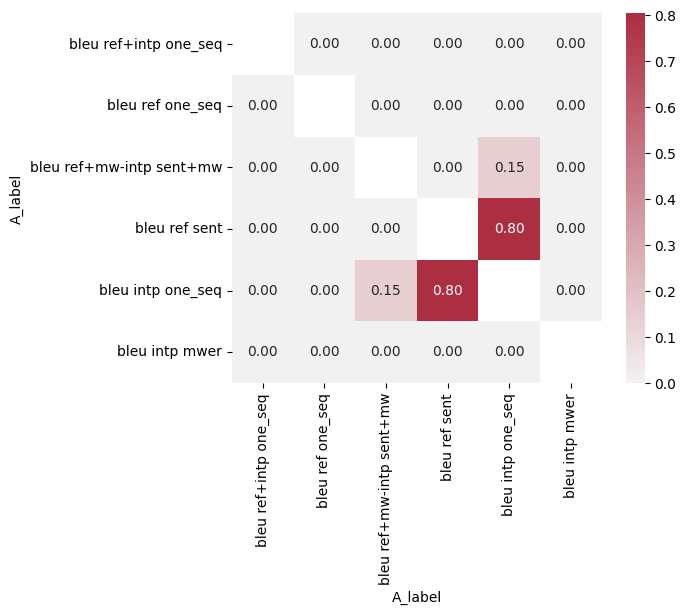

/tmp/ipykernel_2703393/4046287921.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  e = e.pivot("A_label","B_label","A_B_sign_level")


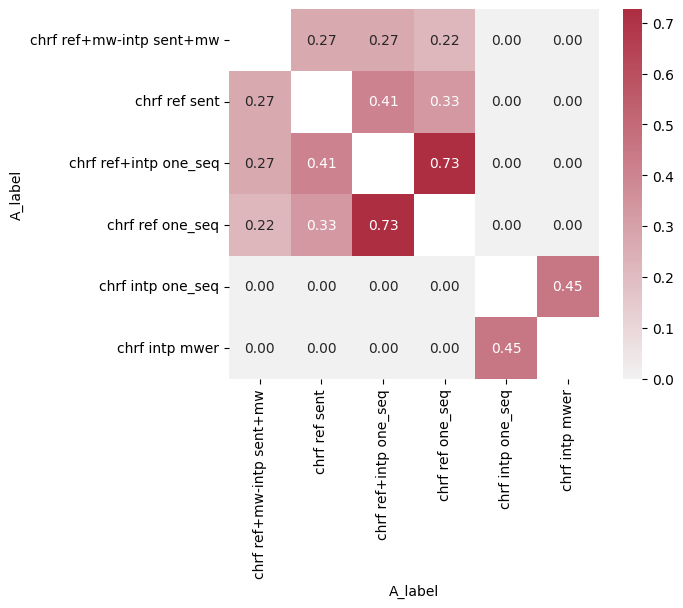

/tmp/ipykernel_2703393/4046287921.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  e = e.pivot("A_label","B_label","A_B_sign_level")


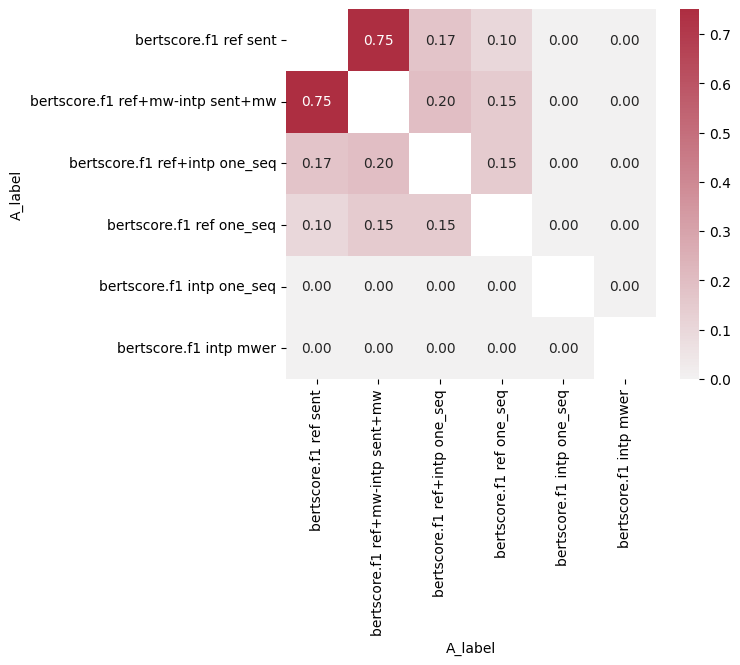

/tmp/ipykernel_2703393/4046287921.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  e = e.pivot("A_label","B_label","A_B_sign_level")


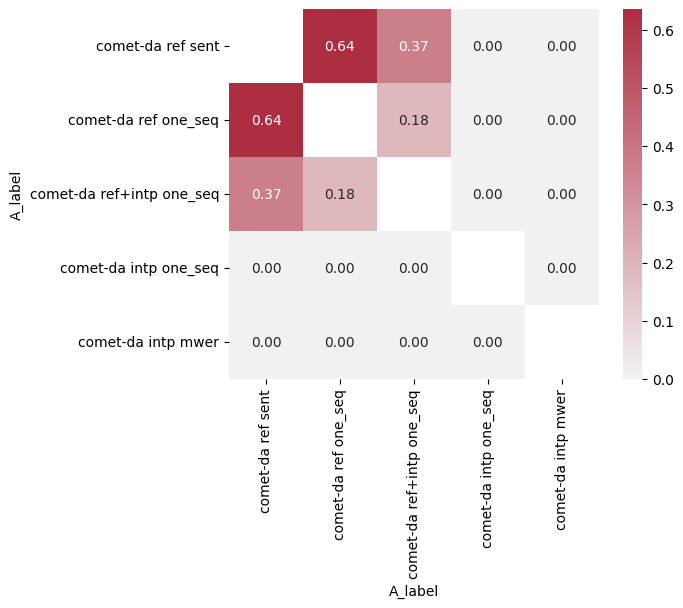

In [9]:
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
#plt.figure(figsize=(20, 12))

d = h[h.subset=="both"]

for m in ["metric"]: #,"align"]:
    d = d[d["A_"+m]==d["B_"+m]]
print(sorted(set(d.A_metric)))
for m in ['bleu', 'chrf', "bertscore.f1", 'comet-da']:
    e = d[d.A_metric==m]
    
    order = sorted(set(zip(e.A_label,e.A_CR_pearson)),key=lambda x:-x[1])

    e = e.pivot("A_label","B_label","A_B_sign_level")
    order = [c for c,_ in order]
    e.index = pd.CategoricalIndex(e.index, categories= order)
    e.columns = pd.CategoricalIndex(e.index, categories= order)
    e.sort_index(level=0, inplace=True)
    e.sort_index(level=0, axis=1, inplace=True)

    sns.heatmap(data=e,
               #annot=False,
               center=0, annot=True,
                fmt='.2f', square=True, cmap=cmap)
    plt.show()

## Which metric?

[('comet-da ref sent', 0.796103953683119), ('comet-da ref one_seq', 0.7923651239029432), ('bertscore.f1 ref sent', 0.7676298658254183), ('bertscore.f1 ref one_seq', 0.752858469570867), ('chrf ref sent', 0.7313755210409066), ('chrf ref one_seq', 0.7226648324543509), ('bleu ref one_seq', 0.7095519042055043), ('bleu ref sent', 0.6539359872387543)]
0           comet-da ref sent
1        comet-da ref one_seq
2       bertscore.f1 ref sent
3    bertscore.f1 ref one_seq
4               chrf ref sent
5            chrf ref one_seq
6            bleu ref one_seq
7               bleu ref sent
Name: A_label, dtype: category
Categories (8, object): ['comet-da ref sent', 'comet-da ref one_seq', 'bertscore.f1 ref sent', 'bertscore.f1 ref one_seq', 'chrf ref sent', 'chrf ref one_seq', 'bleu ref one_seq', 'bleu ref sent']


/tmp/ipykernel_2703393/226537078.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d = d.pivot("A_label","B_label","A_B_sign_level")


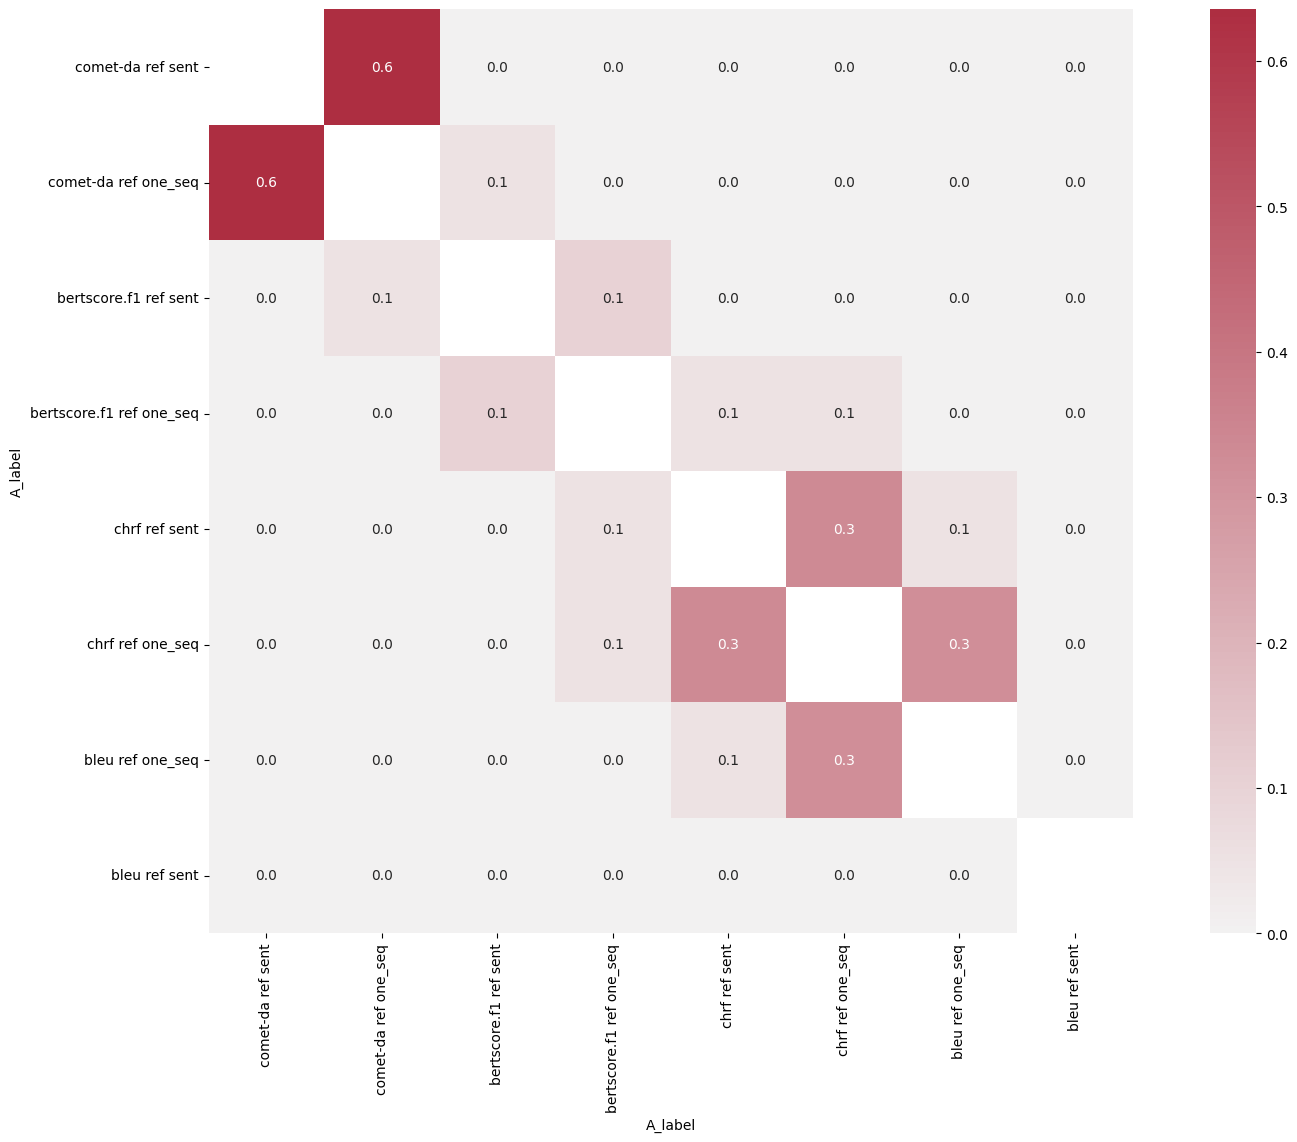

[('comet-da intp one_seq', 0.7666194865813799), ('comet-da intp mwer', 0.7066723834504169), ('bertscore.f1 intp one_seq', 0.6882929980244962), ('chrf intp one_seq', 0.6616671905938879), ('chrf intp mwer', 0.6503600967163684), ('bleu intp one_seq', 0.6487256093819578), ('bertscore.f1 intp mwer', 0.5960791536306533), ('bleu intp mwer', 0.5783898483824839)]
0        comet-da intp one_seq
1           comet-da intp mwer
2    bertscore.f1 intp one_seq
3            chrf intp one_seq
4               chrf intp mwer
5            bleu intp one_seq
6       bertscore.f1 intp mwer
7               bleu intp mwer
Name: A_label, dtype: category
Categories (8, object): ['comet-da intp one_seq', 'comet-da intp mwer', 'bertscore.f1 intp one_seq', 'chrf intp one_seq', 'chrf intp mwer', 'bleu intp one_seq', 'bertscore.f1 intp mwer', 'bleu intp mwer']


/tmp/ipykernel_2703393/226537078.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  d = d.pivot("A_label","B_label","A_B_sign_level")


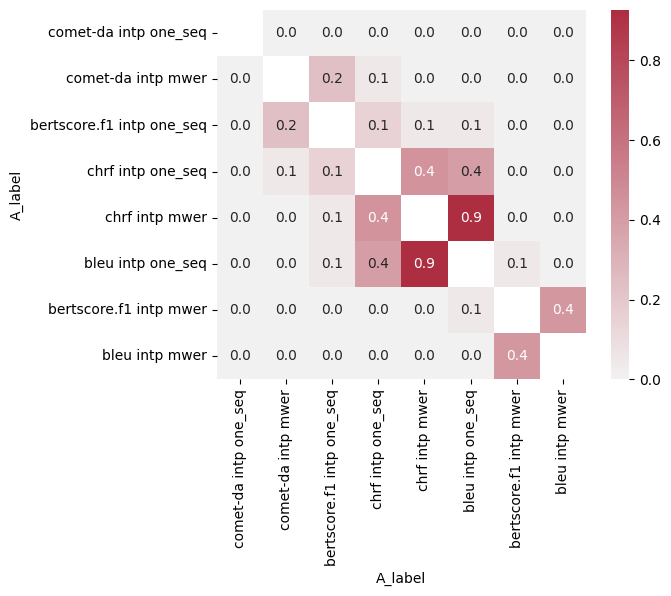

In [10]:
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(20, 12))

for R in ["ref","intp"]:
    d = h[h.subset=="both"]
    d = d[d.A_ref==R]
    d = d[d.B_ref==R]
    #d = d[d["A_align"]=="sent"]
    #d = d[d.B_align=="sent"]

    order = sorted(set(zip(d.A_label,d.A_CR_pearson)),key=lambda x:-x[1])
    print(order)
    d = d.pivot("A_label","B_label","A_B_sign_level")
    order = [c for c,_ in order]
    d.index = pd.CategoricalIndex(d.index, categories= order)
    d.columns = pd.CategoricalIndex(d.index, categories= order)
    d.sort_index(level=0, inplace=True)
    d.sort_index(level=0, axis=1, inplace=True)
    def keyfun(x):
        #lambda x:[order.index(i) for i in x]
        print(x)
        return x
    d.sort_values(by="A_label", axis=1, key=keyfun)
    sns.heatmap(data=d,
               #annot=False,
               center=0, annot=True,
                fmt='.1f', square=True, cmap=cmap)
    plt.show()